In [1]:
%matplotlib inline
import sys, os
sys.path.append('../..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from tools.display import highchart
from tools.instruments import instruments

from sktime.base import load

#from sklearn.model_selection import GridSearchCV
#from sktime.classification.feature_based import TSFreshClassifier
from sktime.classification.deep_learning.cnn import CNNClassifier

In [63]:
from sktime.transformations.series.impute import Imputer

In [226]:
y_test[3]

348.0

In [227]:
y_test.iloc[3] = np.nan
y_hat = transformer.transform(y_test)

In [231]:
y_hat.iloc[3]

374.23237461932445

In [2]:
period = 20
filepath = os.path.join('..','..','data','trend index','training set', f'trend_{period}day.hdf')
file = h5py.File(filepath, mode='r')

In [4]:
ohlc  = file['ohlc'][:]
trend = file['trend'][:]
# shuffling
idx = np.random.permutation(len(ohlc))
ohlc = ohlc[idx]
trend = trend[idx]

print(ohlc.shape)
print(trend.shape)

(1139, 4, 20)
(1139,)


In [5]:
x = ohlc[0]

In [65]:
original.shape

(1008, 4, 200)

In [66]:
ohlc.shape

(1139, 4, 20)

In [67]:
y=np.full((1139,4, 200) , np.nan)

In [68]:
period = 20
idx = [200-i for i in range(1, 200, round(200/period))][:period]

In [75]:
y[:,:,idx]=ohlc

In [77]:
y.shape

(1139, 4, 200)

In [60]:
period = 200
filepath = os.path.join('..','..','data','trend index','training set', f'trend_{period}day.hdf')
file2 = h5py.File(filepath, mode='r')
original = file2['ohlc'][:]

In [79]:
transformer = Imputer(method="linear")
#transformer.fit(original)

In [83]:
ad=instruments['AD'].quotes(fields='ohlc').dropna()

In [86]:
df=ad.iloc[100:120].copy()

In [87]:
df

field,open,high,low,close
date,,,,
1987-06-05,0.0955,0.0958,0.0941,0.0945
1987-06-08,0.0955,0.0955,0.0948,0.0950
1987-06-09,0.0951,0.0954,0.0950,0.0954
1987-06-10,0.0968,0.0976,0.0964,0.0975
1987-06-11,0.0973,0.0976,0.0972,0.0972
1987-06-12,0.0978,0.0993,0.0978,0.0988
1987-06-15,0.0975,0.0982,0.0975,0.0979
1987-06-16,0.1008,0.1013,0.1004,0.1013
1987-06-17,0.1023,0.1064,0.1023,0.1061


In [101]:
df.resample(pd.Timedelta(2.7, "h")).interpolate()

field,open,high,low,close
date,,,,
1987-06-05 00:00:00,0.095500,0.095800,0.094100,0.094500
1987-06-05 02:42:00,0.095510,0.095824,0.094117,0.094528
1987-06-05 05:24:00,0.095519,0.095848,0.094134,0.094557
1987-06-05 08:06:00,0.095528,0.095872,0.094151,0.094585
1987-06-05 10:48:00,0.095538,0.095895,0.094168,0.094613
...,...,...,...,...
1987-07-01 13:12:00,0.104315,0.104445,0.103545,0.103845
1987-07-01 15:54:00,0.104412,0.104509,0.103634,0.103909
1987-07-01 18:36:00,0.104508,0.104573,0.103723,0.103973


<Axes: xlabel='date'>

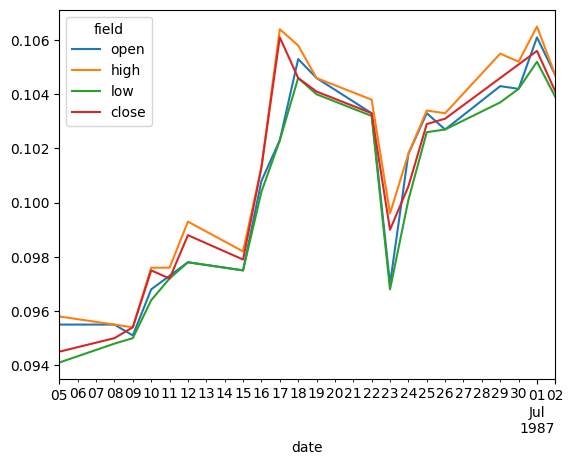

In [104]:
df.resample(pd.Timedelta(2.4, "h")).interpolate().plot()

<Axes: xlabel='date'>

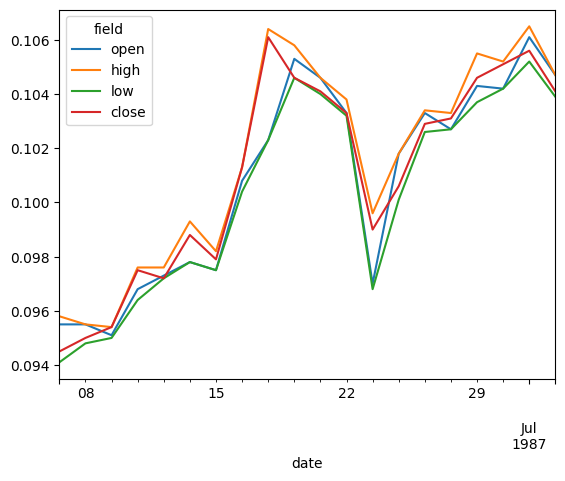

In [99]:
df.plot()